In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('US_Accidents_March23.csv')

In [3]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.shape

(7728394, 46)

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', dayfirst=True, errors='coerce')

In [9]:
df['Start_Time'].unique()

<DatetimeArray>
['2016-02-08 05:46:00', '2016-02-08 06:07:59', '2016-02-08 06:49:27',
 '2016-02-08 07:23:34', '2016-02-08 07:39:07', '2016-02-08 07:44:26',
 '2016-02-08 07:59:35', '2016-02-08 07:59:58', '2016-02-08 08:00:40',
 '2016-02-08 08:10:04',
 ...
 '2019-08-23 16:21:33', '2019-08-23 17:10:58', '2019-08-23 17:42:27',
 '2019-08-23 17:40:12', '2019-08-23 17:43:56', '2019-08-23 18:30:23',
 '2019-08-23 18:03:25', '2019-08-23 19:11:30', '2019-08-23 19:00:21',
 '2019-08-23 18:52:06']
Length: 5539721, dtype: datetime64[ns]

In [10]:
#split the dataset from 2019 to 2023
# Specify the start and end dates as strings
start_date_str = '2019-03-01'
end_date_str = '2023-03-01'

# Convert the start and end dates to datetime type
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame based on the date range
filtered_df = df[(df['Start_Time'] >= start_date) & (df['Start_Time'] <= end_date)]
#we sort our dataset from 2019 to 2021
filtered_df = filtered_df.sort_values(['Start_Time'],ascending=True)

In [11]:
filtered_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7387291,A-7436657,Source1,2,2019-03-01 00:08:44,2019-03-01 04:08:44,42.599005,-123.383793,42.601778,-123.383208,0.194,...,False,False,False,False,False,False,Night,Night,Night,Night
7387293,A-7436659,Source1,2,2019-03-01 00:10:17,2019-03-01 04:23:49,42.775101,-123.292037,42.766740,-123.332670,2.140,...,False,False,False,False,False,False,Night,Night,Night,Night
7387292,A-7436658,Source1,4,2019-03-01 00:13:28,2019-03-01 05:12:08,43.261270,-122.428390,43.333501,-123.011105,29.725,...,False,False,False,False,False,False,Night,Night,Night,Night
2243951,A-2253818,Source2,2,2019-03-01 00:19:56,2019-03-01 00:49:46,38.363258,-122.725243,NaN,NaN,0.000,...,False,False,True,False,False,False,Night,Night,Night,Night
2243952,A-2253819,Source2,2,2019-03-01 00:23:48,2019-03-01 00:53:32,38.103210,-122.514114,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668521,A-3691652,Source1,2,2023-02-28 14:59:00,2023-02-28 17:02:49,38.009086,-78.490971,38.010510,-78.489838,0.116,...,False,False,False,False,False,False,Day,Day,Day,Day
3674231,A-3700088,Source1,2,2023-02-28 14:59:00,2023-02-28 17:02:49,38.010510,-78.489838,38.008707,-78.491273,0.147,...,False,False,False,False,False,False,Day,Day,Day,Day
3666792,A-3689049,Source1,4,2023-02-28 14:59:00,2023-02-28 17:02:49,38.010510,-78.489838,38.008707,-78.491273,0.147,...,False,False,False,False,False,False,Day,Day,Day,Day
3666325,A-3688359,Source1,4,2023-02-28 14:59:00,2023-02-28 17:02:49,38.009086,-78.490971,38.010510,-78.489838,0.116,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4789383 entries, 7387291 to 3655797
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code         

In [13]:
filtered_df.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4.789383e+06,4789383,4.789383e+06,4.789383e+06,3.059198e+06,3.059198e+06,4.789383e+06,4.685236e+06,4.602438e+06,4.678205e+06,4.701196e+06,4.682173e+06,4.651510e+06,4.519273e+06
mean,2.159906e+00,2021-04-08 16:58:29.342407936,3.611730e+01,-9.468564e+01,3.613978e+01,-9.595508e+01,6.207775e-01,6.176422e+01,6.059087e+01,6.456795e+01,2.934844e+01,9.082688e+00,7.271170e+00,5.835620e-03
min,1.000000e+00,2019-03-01 00:08:44,2.455480e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2020-05-18 12:06:13.500000,3.336744e+01,-1.172369e+02,3.338681e+01,-1.178329e+02,0.000000e+00,4.900000e+01,4.900000e+01,4.800000e+01,2.917000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,2021-04-25 09:08:00,3.579027e+01,-8.743887e+01,3.607745e+01,-8.850898e+01,6.400000e-02,6.400000e+01,6.400000e+01,6.700000e+01,2.968000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,2022-02-27 04:27:52.500000,3.999989e+01,-8.032963e+01,4.005704e+01,-8.024304e+01,5.480000e-01,7.600000e+01,7.600000e+01,8.400000e+01,2.995000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,2023-02-28 19:22:00,4.900220e+01,-6.748413e+01,4.900222e+01,-6.748413e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01
std,4.582357e-01,NaN,5.097682e+00,1.745550e+01,5.284136e+00,1.819329e+01,1.834326e+00,1.884660e+01,2.096278e+01,2.294396e+01,1.110263e+00,2.565530e+00,5.501232e+00,5.482148e-02


In [14]:
filtered_df.isnull().sum().sort_values(ascending=False)

End_Lat                  1730185
End_Lng                  1730185
Precipitation(in)         270110
Wind_Chill(F)             186945
Wind_Speed(mph)           137873
Wind_Direction            126067
Humidity(%)               111178
Visibility(mi)            107210
Temperature(F)            104147
Weather_Condition         104085
Pressure(in)               88187
Weather_Timestamp          79156
Nautical_Twilight          17391
Civil_Twilight             17391
Sunrise_Sunset             17391
Astronomical_Twilight      17391
Airport_Code               15432
Street                      8401
Timezone                    4877
Zipcode                     1136
City                         159
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

<Axes: title={'center': 'the percentage of missing values in our dataset'}>

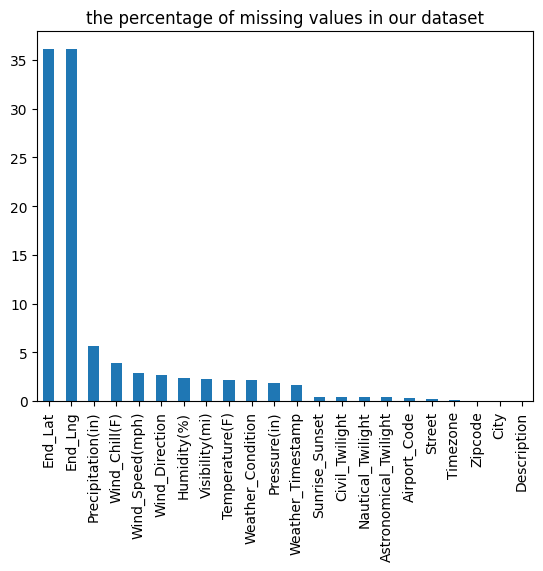

In [15]:
#calcul the percentage of missing values in our datasets
per_missing_values =(filtered_df.isnull().sum()) / (len(filtered_df))*100
#lets remove the columns that has 0% (we don't need them in our bar chart)
per_missing_values = per_missing_values[per_missing_values > 0 ]
#sort the dataframe
per_missing_values = per_missing_values.sort_values(ascending=False)
per_missing_values.plot(kind='bar',title='the percentage of missing values in our dataset')

In [16]:
filtered_df["Temperature(F)"]=filtered_df["Temperature(F)"].fillna(filtered_df["Temperature(F)"].median())
filtered_df["Humidity(%)"]=filtered_df["Humidity(%)"].fillna(filtered_df["Humidity(%)"].median())
filtered_df["Visibility(mi)"]=filtered_df["Visibility(mi)"].fillna(filtered_df["Visibility(mi)"].median())
filtered_df["Weather_Condition"]=filtered_df["Weather_Condition"].fillna(filtered_df["Weather_Condition"].mode()[0])
filtered_df.dropna(subset=["City"],inplace=True)

In [17]:
filtered_df.drop(columns={'ID','Source','Precipitation(in)','Wind_Chill(F)','Astronomical_Twilight','Nautical_Twilight',
                 'Civil_Twilight','Sunrise_Sunset','Turning_Loop','Traffic_Calming','Stop','Station','Roundabout',
                'Railway','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit','Precipitation(in)',
                'Zipcode', 'Country','Airport_Code', 'Weather_Timestamp','End_Lat','End_Lng', 'Distance(mi)', 
                          'Description', 'Street','End_Time'}, inplace=True)

In [18]:
filtered_df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'County',
       'State', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Traffic_Signal'],
      dtype='object')

In [19]:
#Severity
filtered_df['Severity'].unique()

array([2, 4, 3, 1], dtype=int64)

In [20]:
filtered_df['Severity'].value_counts()

Severity
2    4004837
3     603255
4     114571
1      66561
Name: count, dtype: int64

<Axes: xlabel='Severity', ylabel='Count'>

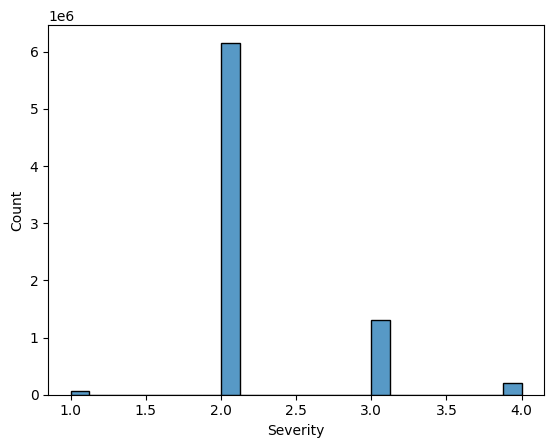

In [21]:
sns.histplot(data=df['Severity'])
#Most of the accidents were with severity 2.
#114571 accidents had highest severity (severity 4) i.e. their impact on traffic was highest.

In [22]:
#Year wise accidents
import datetime as dt
filtered_df['Year']=filtered_df['Start_Time'].dt.year

In [23]:
data=filtered_df['Year'].value_counts()
data

Year
2021    1412384
2022    1268763
2020    1161549
2019     800287
2023     146241
Name: count, dtype: int64

<Axes: xlabel='Year'>

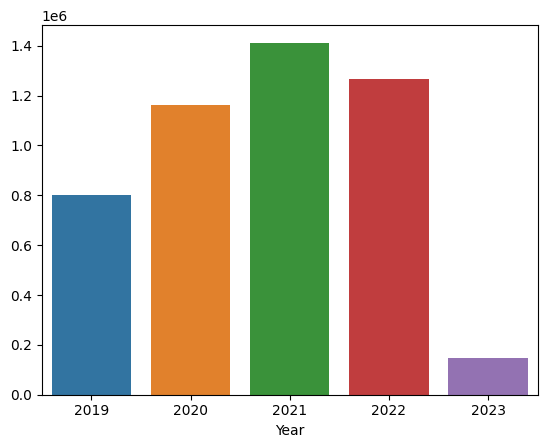

In [24]:
sns.barplot(x=data.index, y=data.values, data=filtered_df)
#most of the accidents are held in 2021

In [38]:
filtered_df['Month']=filtered_df['Start_Time'].dt.month_name()

In [39]:
filtered_df['Month'].value_counts()

Month
December     557225
November     478276
January      442487
October      412397
September    388851
April        387337
February     386765
June         380091
May          370331
March        342904
August       333349
July         309211
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

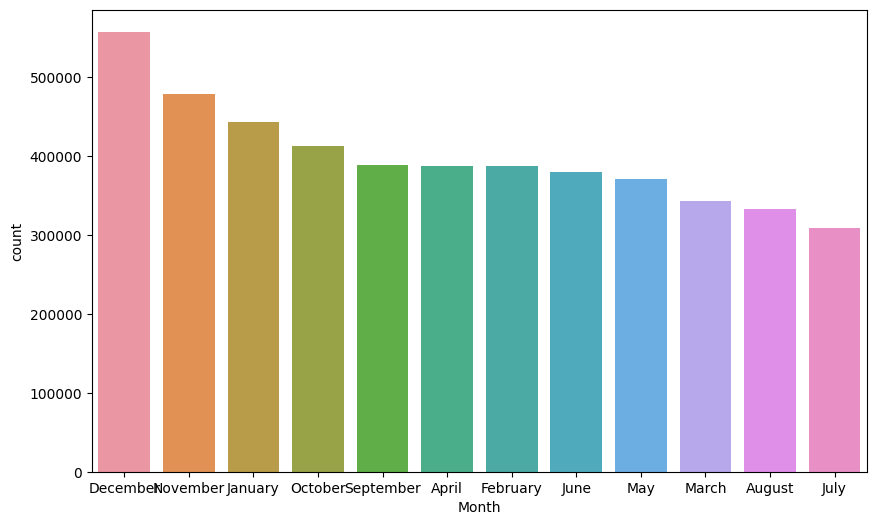

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df['Month'].value_counts().index, y=filtered_df['Month'].value_counts())

In [124]:
# Group the data by 'Year' and 'Month' and count the occurrences of accidents in each group
accidents_by_year_month = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')
accidents_by_year_month

,Year,Month,Accident_Count
0,2019,April,73018
1,2019,August,75269
2,2019,December,98358
3,2019,July,68255
4,2019,June,65525
5,2019,March,69436
6,2019,May,73897
7,2019,November,81920
8,2019,October,106910
9,2019,September,87699


In [34]:
filtered_df['Hour']=filtered_df['Start_Time'].dt.hour #extracting hour from start time
filtered_df['Hour']

7387291     0
7387293     0
7387292     0
2243951     0
2243952     0
           ..
3668521    14
3674231    14
3666792    14
3666325    14
3655797    19
Name: Hour, Length: 4789224, dtype: int32

In [53]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [54]:
filtered_df['Time_Category'] = filtered_df['Hour'].apply(categorize_time)

In [55]:
time_counts = filtered_df['Time_Category'].value_counts()
time_counts

Time_Category
Morning      1691624
Afternoon    1433066
Evening       940789
Night         723745
Name: count, dtype: int64

In [56]:
# Sort the categories in the desired order
time_ordered = ['Morning', 'Afternoon', 'Evening', 'Night']
time_counts = time_counts.reindex(time_ordered)

<Axes: xlabel='Time_Category', ylabel='count'>

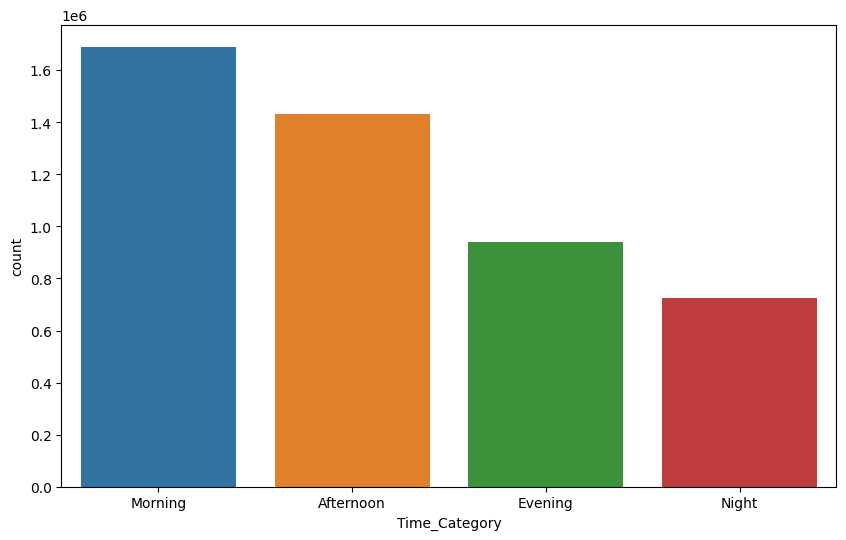

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=time_counts.index, y=time_counts)

In [46]:
filtered_df['Dayofweek'] = filtered_df['Start_Time'].dt.strftime('%A') #extracting weeks from start_time
filtered_df['Dayofweek'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [50]:
day_counts = filtered_df['Dayofweek'].value_counts()
day_counts

Dayofweek
Friday       839157
Thursday     801041
Wednesday    793486
Tuesday      773749
Monday       733315
Saturday     462398
Sunday       386078
Name: count, dtype: int64

In [51]:
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_ordered)

<Axes: xlabel='Dayofweek', ylabel='count'>

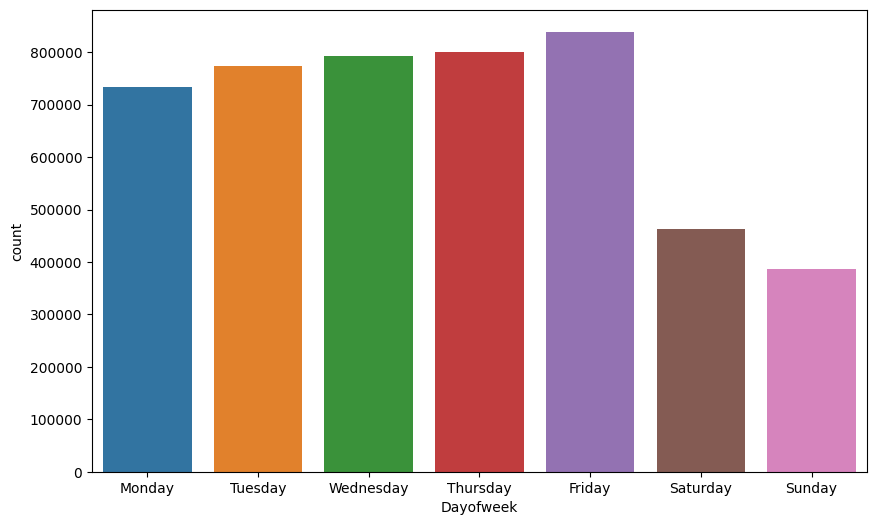

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts)

In [58]:
# Count the occurrences of accidents in each weekday-time category
weekday_time_counts = filtered_df.groupby(['Dayofweek', 'Time_Category']).size().unstack().reindex(days_ordered, columns=time_ordered)
weekday_time_counts

Time_Category,Morning,Afternoon,Evening,Night
Dayofweek,,,,
Monday,280891,216125,140563,95736
Tuesday,303935,224700,150166,94948
Wednesday,305195,230592,155983,101716
Thursday,302200,237613,154825,106403
Friday,282678,267305,170538,118636
Saturday,120574,143216,90403,108205
Sunday,96151,113515,78311,98101


<Axes: xlabel='Time_Category', ylabel='Dayofweek'>

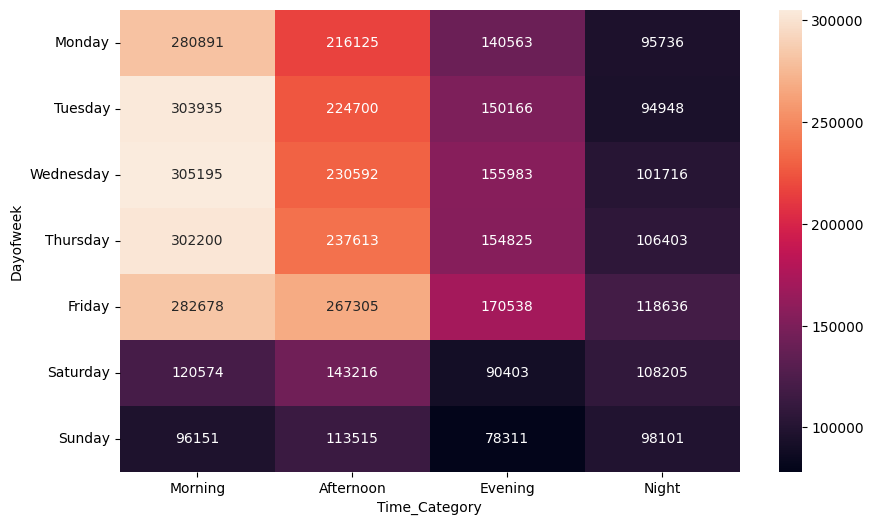

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(weekday_time_counts, annot=True, fmt='d')

In [62]:
#findind top 10 city which is accident prone
cities_by_accidents=filtered_df['City'].value_counts()
cities_by_accidents

City
Miami                 132270
Los Angeles            93102
Houston                84855
Charlotte              80538
Dallas                 75250
                       ...  
Bitely                     1
Palmview                   1
Wolsey                     1
Grosse Pointe Park         1
Eagle Nest                 1
Name: count, Length: 12738, dtype: int64

In [103]:
cities_by_accidents[:10]

City
Miami          132270
Los Angeles     93102
Houston         84855
Charlotte       80538
Dallas          75250
Orlando         71983
Raleigh         50014
Nashville       47444
Austin          47234
Baton Rouge     45368
Name: count, dtype: int64

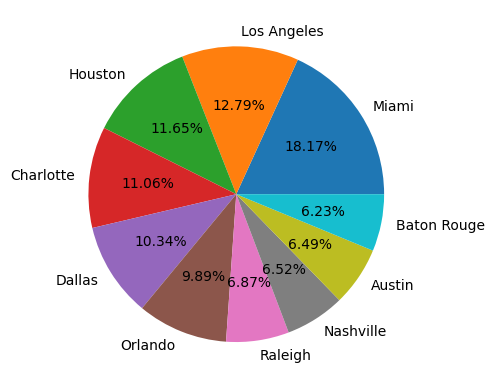

In [63]:
plt.pie(cities_by_accidents.values[:10],labels=cities_by_accidents.index[:10],autopct='%1.2f%%') #to get the top 5 cities we used slicing in values and in index(city name), autopct is used to get percentage
plt.show()

In [76]:
high_accidents=cities_by_accidents[cities_by_accidents>5000]
avg_accidents=cities_by_accidents[(cities_by_accidents >= 50) & (cities_by_accidents <= 5000)]
low_accidents=cities_by_accidents[cities_by_accidents==1]

In [77]:
high_accidents

City
Miami          132270
Los Angeles     93102
Houston         84855
Charlotte       80538
Dallas          75250
                ...  
Ogden            5270
Garner           5196
Chesapeake       5178
Salinas          5102
Frederick        5067
Name: count, Length: 139, dtype: int64

In [78]:
Avg_accidents

City
Salem                 4947
Colton                4905
Livermore             4856
Decatur               4721
Tuscaloosa            4663
                      ... 
Bitely                   1
Palmview                 1
Wolsey                   1
Grosse Pointe Park       1
Eagle Nest               1
Name: count, Length: 12599, dtype: int64

In [79]:
low_accidents

City
Teague                1
Knotts Island         1
Marfa                 1
West Brookfield       1
Rock Rapids           1
                     ..
Bitely                1
Palmview              1
Wolsey                1
Grosse Pointe Park    1
Eagle Nest            1
Name: count, Length: 1020, dtype: int64

In [80]:
#finding miami each month accidents
miami_accidents=filtered_df[filtered_df['City']=='Miami']
miami_accidents

,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Timezone,Temperature(F),Humidity(%),...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Traffic_Signal,Year,Month,Hour,Dayofweek,Time_Category
7387040,2,2019-03-01 02:56:58,25.785620,-80.191290,Miami,Miami-Dade,FL,US/Eastern,69.1,93.0,...,10.0,Calm,NaN,Partly Cloudy,False,2019,March,2,Friday,Night
7387041,2,2019-03-01 02:56:58,25.787220,-80.185410,Miami,Miami-Dade,FL,US/Eastern,69.1,93.0,...,10.0,Calm,NaN,Partly Cloudy,False,2019,March,2,Friday,Night
2242401,3,2019-03-01 05:19:50,25.832771,-80.205933,Miami,Miami-Dade,FL,US/Eastern,66.9,90.0,...,10.0,Calm,NaN,Clear,False,2019,March,5,Friday,Morning
7387043,3,2019-03-01 05:39:43,25.828720,-80.206080,Miami,Miami-Dade,FL,US/Eastern,68.0,96.0,...,10.0,Calm,NaN,Partly Cloudy,False,2019,March,5,Friday,Morning
2242400,3,2019-03-01 05:48:55,25.813820,-80.207367,Miami,Miami-Dade,FL,US/Eastern,68.0,96.0,...,10.0,Calm,NaN,Partly Cloudy,False,2019,March,5,Friday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667350,2,2023-02-26 06:38:59,25.920986,-80.211257,Miami,Miami-Dade,FL,US/Eastern,66.0,90.0,...,10.0,CALM,0.0,Fair,False,2023,February,6,Sunday,Morning
3661169,2,2023-02-26 10:44:30,25.930963,-80.204789,Miami,Miami-Dade,FL,US/Eastern,80.0,60.0,...,10.0,VAR,5.0,Fair,False,2023,February,10,Sunday,Morning
3644190,2,2023-02-26 17:20:59,25.963075,-80.166243,Miami,Miami-Dade,FL,US/Eastern,82.0,47.0,...,10.0,ESE,9.0,Mostly Cloudy,False,2023,February,17,Sunday,Evening
3662169,2,2023-02-26 17:20:59,25.963075,-80.166243,Miami,Miami-Dade,FL,US/Eastern,82.0,47.0,...,10.0,ESE,9.0,Mostly Cloudy,False,2023,February,17,Sunday,Evening


In [84]:
# Extract the month component from the 'Start_Time' column
miami_accidents['Month'] = filtered_df['Start_Time'].dt.month_name()

In [87]:
miami_accidents_by_month = miami_accidents.groupby('Month').size()
miami_accidents_by_month.sort_values(ascending=False)

Month
December     17134
November     15424
January      13979
October      13185
September    11400
February     11322
April        11063
May          10003
March         7666
June          7626
August        7283
July          6185
dtype: int64

In [104]:
# Filter the data for the top 10 cities
top_cities = ['Miami', 'Los Angeles', 'Houston', 'Charlotte', 'Dallas', 'Orlando', 
              'Raleigh', 'Nashville', 'Austin', 'Baton Rouge']
top_cities_df = filtered_df[filtered_df['City'].isin(top_cities)]

In [105]:
# Group the data by 'City' and 'Month' and count the occurrences of accidents in each group
accidents_by_city_month = top_cities_df.groupby(['City', 'Month']).size().reset_index(name='Accident_Count')
accidents_by_city_month

,City,Month,Accident_Count
0,Austin,April,3133
1,Austin,August,3549
2,Austin,December,4737
3,Austin,February,3053
4,Austin,January,3500
...,...,...,...
115,Raleigh,March,4241
116,Raleigh,May,3222
117,Raleigh,November,5644
118,Raleigh,October,4395


In [107]:
# Find the month with the highest accidents among the top 10 cities
highest_month = accidents_by_city_month.loc[accidents_by_city_month['Accident_Count'].idxmax()]
highest_month

City                 Miami
Month             December
Accident_Count       17134
Name: 74, dtype: object

In [109]:
#weather condition
filtered_df['Weather_Condition'].unique()

array(['Light Freezing Fog', 'Overcast', 'Clear', 'Light Rain',
       'Light Ice Pellets', 'Fair', 'Mostly Cloudy', 'Partly Cloudy',
       'Scattered Clouds', 'Haze', 'Fog', 'Light Snow', 'Light Drizzle',
       'Snow', 'Heavy Snow', 'Cloudy', 'Rain', 'Mist', 'Drizzle',
       'Heavy Thunderstorms and Rain', 'Thunderstorms and Rain',
       'Thunderstorm', 'Heavy Rain', 'Partly Cloudy / Windy',
       'Light Thunderstorms and Rain', 'Light Freezing Rain',
       'Light Freezing Drizzle', 'N/A Precipitation', 'Fair / Windy',
       'Patches of Fog', 'Heavy Drizzle', 'Heavy T-Storm', 'Thunder',
       'Smoke', 'Rain Showers', 'T-Storm', 'Mostly Cloudy / Windy',
       'Cloudy / Windy', 'Wintry Mix', 'Light Thunderstorms and Snow',
       'Widespread Dust', 'Ice Pellets', 'Shallow Fog',
       'Light Snow Showers', 'Heavy Blowing Snow', 'Snow / Windy',
       'Blowing Snow', 'Light Rain Showers', 'Squalls',
       'Light Rain with Thunder', 'Hail', 'Light Rain / Windy',
       'Showers 

In [112]:
# top 20 weather conditions having most accidents
# Group the data by 'Weather_Condition' and 'City' and count the occurrences of accidents in each group
weather_city_accidents = df.groupby(['Weather_Condition', 'City']).size().reset_index(name='Accident_Count')
weather_city_accidents

,Weather_Condition,City,Accident_Count
0,Blowing Dust,Agoura Hills,1
1,Blowing Dust,American Fork,2
2,Blowing Dust,Austin,6
3,Blowing Dust,Bakersfield,9
4,Blowing Dust,Baldwin Park,1
...,...,...,...
136658,Wintry Mix / Windy,Wichita Falls,2
136659,Wintry Mix / Windy,Wood River,1
136660,Wintry Mix / Windy,Woodside,1
136661,Wintry Mix / Windy,Wyoming,1


In [113]:
# Sort the data in descending order based on accident counts
weather_city_accidents_sorted = weather_city_accidents.sort_values(by='Accident_Count', ascending=False)
weather_city_accidents_sorted

,Weather_Condition,City,Accident_Count
28401,Fair,Los Angeles,71500
29015,Fair,Miami,60236
84467,Mostly Cloudy,Miami,45530
30141,Fair,Orlando,39546
25086,Fair,Dallas,38618
...,...,...,...
108142,Partly Cloudy / Windy,Everett,1
108143,Partly Cloudy / Windy,Exeter,1
54687,Heavy Thunderstorms and Rain,Davie,1
108145,Partly Cloudy / Windy,Fabens,1


In [114]:
# Get the top 20 weather conditions with the most accidents along with the corresponding cities
top_20_weather_conditions = weather_city_accidents_sorted.head(20)
top_20_weather_conditions

,Weather_Condition,City,Accident_Count
28401,Fair,Los Angeles,71500
29015,Fair,Miami,60236
84467,Mostly Cloudy,Miami,45530
30141,Fair,Orlando,39546
25086,Fair,Dallas,38618
24428,Fair,Charlotte,33492
31395,Fair,Sacramento,33008
83119,Mostly Cloudy,Houston,32119
5041,Clear,Los Angeles,31711
80773,Mostly Cloudy,Charlotte,30397


In [122]:
# Effect of Visibility
# variations of number of accidents with Visibilty
plt.figure(figsize=(24,6))
df_visibility = filtered_df.groupby('Visibility(mi)')[['City']].count()
df_visibility.sort_values('City',ascending=False).head(10)

,City
Visibility(mi),
10.0,3891942
7.0,131934
9.0,113473
8.0,91285
5.0,87239
2.0,85435
6.0,77903
1.0,76694
4.0,73524


<Figure size 2400x600 with 0 Axes>

<Axes: xlabel='Visibility(mi)', ylabel='City'>

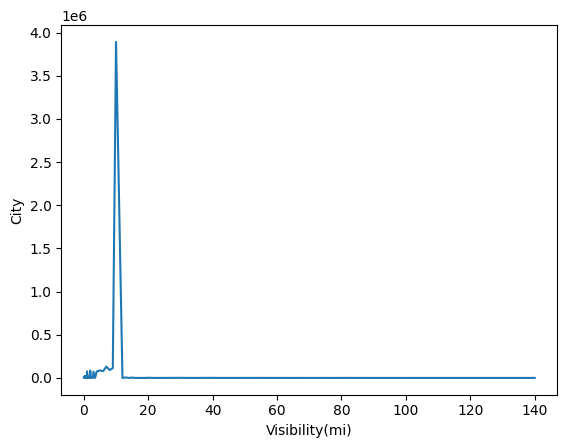

In [123]:
sns.lineplot(x=df_visibility.index, y='City', data= df_visibility)
#Most number of accidents were at visibility 10(mi)
#Suddenly number of accidents decreased as visibility increased.
#In short, number of accidents decreased with increase in visibility.